## Apple Health Data Processor

-----

## Dependencies and Libraries

In [1]:
from datetime import date, datetime, timedelta as td
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

------

## Functions for Processing Dates and Timezones

In [2]:
# functions to convert UTC to Oslo time zone and extract date/time elements
convert_tz = lambda x: x.to_pydatetime().replace(tzinfo=pytz.utc).astimezone(pytz.timezone('Europe/Oslo'))
get_year = lambda x: convert_tz(x).year
get_month = lambda x: '{}-{:02}'.format(convert_tz(x).year, convert_tz(x).month) #inefficient
get_date = lambda x: '{}-{:02}-{:02}'.format(convert_tz(x).year, convert_tz(x).month, convert_tz(x).day) #inefficient
get_day = lambda x: convert_tz(x).day
get_hour = lambda x: convert_tz(x).hour
get_minute = lambda x: convert_tz(x).minute
get_day_of_week = lambda x: convert_tz(x).weekday()

---

## Steps

In [3]:
steps = pd.read_csv("data/StepCount.csv")

In [4]:
steps.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
41092,Seshathiri’s Apple Watch,7.4.1,"<<HKDevice: 0x283877bb0>, name:Apple Watch, ma...",StepCount,count,2021-05-23 20:06:53 +0530,2021-05-23 20:02:59 +0530,2021-05-23 20:03:57 +0530,106
41093,Seshathiri’s Apple Watch,7.4.1,"<<HKDevice: 0x283877bb0>, name:Apple Watch, ma...",StepCount,count,2021-05-23 20:06:53 +0530,2021-05-23 20:06:35 +0530,2021-05-23 20:06:51 +0530,33
41094,Seshathiri’s Apple Watch,7.4.1,"<<HKDevice: 0x283877bb0>, name:Apple Watch, ma...",StepCount,count,2021-05-23 20:16:58 +0530,2021-05-23 20:06:51 +0530,2021-05-23 20:16:25 +0530,185
41095,Seshathiri’s Apple Watch,7.4.1,"<<HKDevice: 0x283877bb0>, name:Apple Watch, ma...",StepCount,count,2021-05-23 20:32:37 +0530,2021-05-23 20:17:00 +0530,2021-05-23 20:25:58 +0530,108
41096,Seshathiri’s Apple Watch,7.4.1,"<<HKDevice: 0x283877bb0>, name:Apple Watch, ma...",StepCount,count,2021-05-23 20:47:01 +0530,2021-05-23 20:27:33 +0530,2021-05-23 20:36:56 +0530,75


In [5]:
# parse out date and time elements as Oslo time
steps['startDate'] = pd.to_datetime(steps['startDate'])
steps['year'] = steps['startDate'].map(get_year)
steps['month'] = steps['startDate'].map(get_month)
steps['date'] = steps['startDate'].map(get_date)
steps['day'] = steps['startDate'].map(get_day)
steps['hour'] = steps['startDate'].map(get_hour)
steps['dow'] = steps['startDate'].map(get_day_of_week)

In [6]:
steps.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date,day,hour,dow
0,Seshathiri’s iPhone,13.1.3,"<<HKDevice: 0x283881450>, name:iPhone, manufac...",StepCount,count,2019-10-17 23:01:40 +0530,2019-10-17 01:18:08+05:30,2019-10-17 01:18:14 +0530,13,2019,2019-10,2019-10-17,17,3,3
1,Seshathiri’s iPhone,13.1.3,"<<HKDevice: 0x283881450>, name:iPhone, manufac...",StepCount,count,2019-10-18 23:38:29 +0530,2019-10-18 23:27:26+05:30,2019-10-18 23:27:29 +0530,13,2019,2019-10,2019-10-19,19,1,5
2,Seshathiri’s iPhone,13.1.3,"<<HKDevice: 0x283881450>, name:iPhone, manufac...",StepCount,count,2019-10-18 23:57:27 +0530,2019-10-18 23:46:47+05:30,2019-10-18 23:56:47 +0530,272,2019,2019-10,2019-10-19,19,1,5
3,Seshathiri’s iPhone,13.1.3,"<<HKDevice: 0x283881450>, name:iPhone, manufac...",StepCount,count,2019-10-19 00:07:50 +0530,2019-10-18 23:56:47+05:30,2019-10-19 00:00:55 +0530,290,2019,2019-10,2019-10-19,19,1,5
4,Seshathiri’s iPhone,13.1.3,"<<HKDevice: 0x283881450>, name:iPhone, manufac...",StepCount,count,2019-10-19 00:22:01 +0530,2019-10-19 00:11:11+05:30,2019-10-19 00:17:22 +0530,72,2019,2019-10,2019-10-19,19,2,5


In [7]:
steps.columns

Index(['sourceName', 'sourceVersion', 'device', 'type', 'unit', 'creationDate',
       'startDate', 'endDate', 'value', 'year', 'month', 'date', 'day', 'hour',
       'dow'],
      dtype='object')

In [8]:
steps_by_date = steps.groupby(['date'])['value'].sum().reset_index(name='Steps')

In [9]:
steps_by_date.tail()

,date,Steps
534,2021-05-08,653
535,2021-05-13,25
536,2021-05-21,29
537,2021-05-22,16
538,2021-05-23,3167


In [10]:
# steps_by_date.tail(10)
steps_by_date.to_csv("data/steps_per_day.csv", index=False)

-----

### Use Only Watch Steps, Remove Phone Steps

In [11]:
steps_device_by_year = steps.groupby(['year', 'sourceName'])['value'].sum().reset_index(name='Steps')

In [12]:
steps_device_by_year

,year,sourceName,Steps
0,2018,Seshathiri’s Apple Watch,24
1,2019,Seshathiri’s Apple Watch,300871
2,2019,Seshathiri’s iPhone,110147
3,2020,Seshathiri’s Apple Watch,1294269
4,2020,Seshathiri’s iPhone,935619
5,2021,Seshathiri’s Apple Watch,371480
6,2021,Seshathiri’s iPhone,215161


In [13]:
steps.sourceName.unique()

array(['Seshathiri’s iPhone', 'Seshathiri’s Apple\xa0Watch'], dtype=object)

In [14]:
# drop phone steps
steps = steps[steps.sourceName == 'Seshathiri’s Apple Watch']
# steps.head()

## Rolling Average

<AxesSubplot:title={'center':'Daily step counts rolling mean over 18 months'}, xlabel='date'>

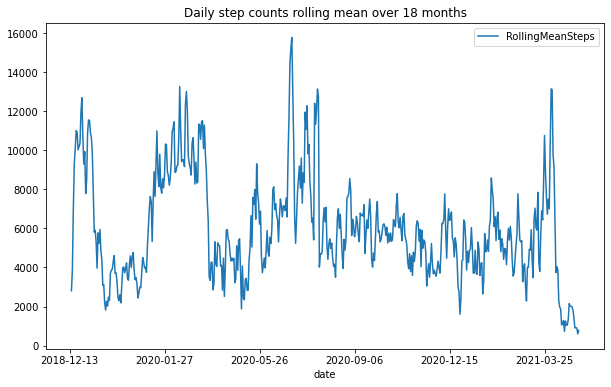

In [16]:
steps_by_date['RollingMeanSteps'] = steps_by_date.Steps.rolling(window=10, center=True).mean()
steps_by_date.plot(x='date', y='RollingMeanSteps', title= 'Daily step counts rolling mean over 18 months', figsize=[10, 6])

## Steps by Day of Week

In [17]:
steps_by_date['date'] = pd.to_datetime(steps_by_date['date'])
steps_by_date['dow'] = steps_by_date['date'].dt.weekday

Text(0.5, 0, 'Day of Week')

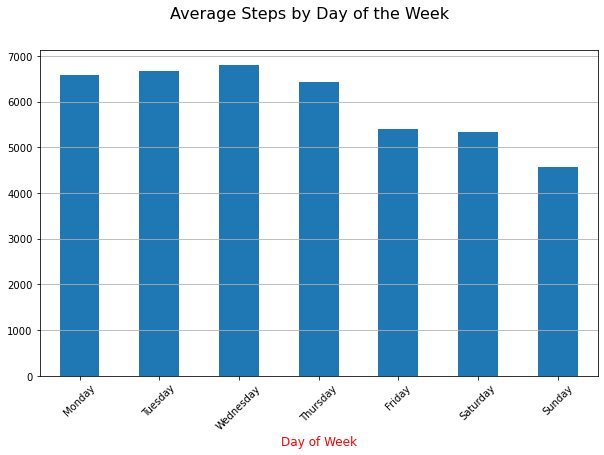

In [18]:
data = steps_by_date.groupby(['dow'])['Steps'].mean()

fig, ax = plt.subplots(figsize=[10, 6])
ax = data.plot(kind='bar', x='day_of_week')

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.75

#fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(True)

plt.suptitle('Average Steps by Day of the Week', fontsize=16)
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(index, dow_labels, rotation=45)
plt.xlabel('Day of Week', fontsize=12, color='red')

## Heart Rate

In [19]:
resting = pd.read_csv("data/RestingHeartRate.csv")
len(resting)

436

In [20]:
resting.columns

Index(['sourceName', 'sourceVersion', 'device', 'type', 'unit', 'creationDate',
       'startDate', 'endDate', 'value'],
      dtype='object')

In [21]:
resting.sourceName.unique()

array(['Seshathiri’s Apple\xa0Watch'], dtype=object)

In [22]:
# parse out date and time elements as Oslo time
resting['startDate'] = pd.to_datetime(resting['startDate'])
resting['year'] = resting['startDate'].map(get_year)
resting['month'] = resting['startDate'].map(get_month)
resting['date'] = resting['startDate'].map(get_date)

In [23]:
# resting.tail(10)

<AxesSubplot:title={'center':'Resting HR'}, xlabel='date'>

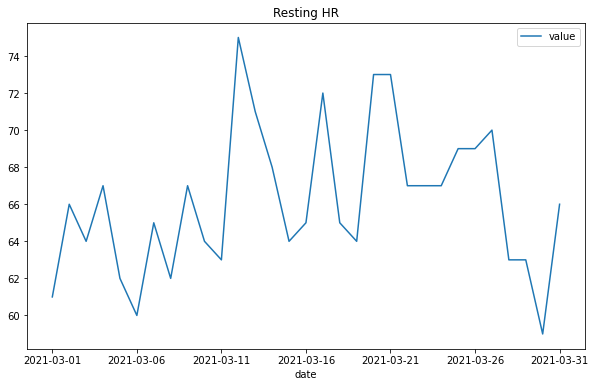

In [24]:
resting[resting.month == '2021-03'].plot(x='date', y='value', title= 'Resting HR', figsize=[10, 6])

In [25]:
hr = pd.read_csv("data/HeartRate.csv")
len(hr)

171534

In [26]:
# hr.tail(10)

In [27]:
# parse out date and time elements as Shanghai time
hr['startDate'] = pd.to_datetime(hr['startDate'])
hr['year'] = hr['startDate'].map(get_year)
hr['month'] = hr['startDate'].map(get_month)
hr['hour'] = hr['startDate'].map(get_hour)
hr['date'] = hr['startDate'].map(get_date)

<AxesSubplot:title={'center':'Heart Rate'}, xlabel='startDate'>

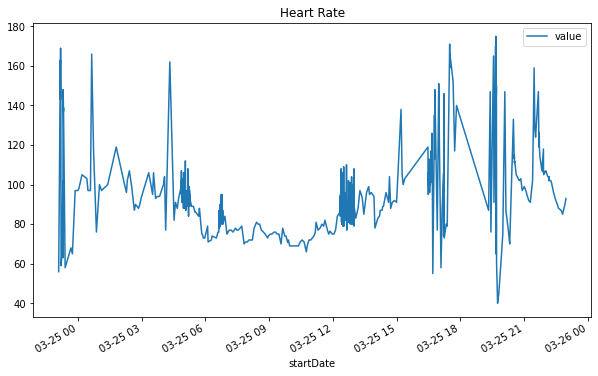

In [28]:
# plot a single day
test_date = '2021-03-25'
# len(hr[hr.date == test_date])
# TODO: Fix Axis for Hour of Day or Something Similar
hr[hr.date == test_date].plot(x='startDate', y='value', title= 'Heart Rate', figsize=[10, 6])

# Sleep

In [29]:
sleep_raw = pd.read_csv("data/SleepAnalysis.csv")

In [30]:
sleep_raw.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
77,Seshathiri’s Apple Watch,7.1,NaN,SleepAnalysis,NaN,2020-12-03 12:55:28 +0530,2020-12-03 08:12:09 +0530,2020-12-03 08:47:09 +0530,HKCategoryValueSleepAnalysisAsleep
78,Seshathiri’s Apple Watch,7.1,NaN,SleepAnalysis,NaN,2020-12-03 12:55:28 +0530,2020-12-03 08:50:39 +0530,2020-12-03 11:56:09 +0530,HKCategoryValueSleepAnalysisAsleep
79,Seshathiri’s Apple Watch,7.1,NaN,SleepAnalysis,NaN,2020-12-03 12:55:28 +0530,2020-12-03 11:58:39 +0530,2020-12-03 12:39:39 +0530,HKCategoryValueSleepAnalysisAsleep
80,Seshathiri’s iPhone,14.2,NaN,SleepAnalysis,NaN,2020-12-03 12:40:00 +0530,2020-12-03 06:40:12 +0530,2020-12-03 12:40:00 +0530,HKCategoryValueSleepAnalysisInBed
81,Seshathiri’s iPhone,14.2,NaN,SleepAnalysis,NaN,2020-12-04 11:30:00 +0530,2020-12-04 02:09:07 +0530,2020-12-04 11:30:00 +0530,HKCategoryValueSleepAnalysisInBed


In [31]:
# parse out date and time elements as Oslo time
steps['startDate'] = pd.to_datetime(steps['startDate'])
steps['year'] = steps['startDate'].map(get_year)
steps['month'] = steps['startDate'].map(get_month)
steps['date'] = steps['startDate'].map(get_date)
steps['day'] = steps['startDate'].map(get_day)
steps['hour'] = steps['startDate'].map(get_hour)
steps['dow'] = steps['startDate'].map(get_day_of_week)